In [5]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# BLOOD PRESSURE EFFECTS
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 100.0
# maximum effect on heart rate with hypotension     = (min - set) * gain = (20 - 57.5)  * -1.88 = 70.5   + heart_rate_ref = max hr 210.5
# maximum effect on heart rate with hypertension    = (max - set) * gain = (100 - 57.5) * -1.88 = -42.55 + heart_rate_ref = min hr 60.1
models["Ans"].heart_rate_ref = 140.0
models["Ans"].g_map_hp = -1.88              
models["Ans"].tc_map_hp = 2.0
# maximum effect is 50% volume change on the venous reservoirs IVCE and SVC
# maximum effect on venpool with hypotension = (min - set) = -37.5 -> u_vol smaller by 50% = -0.5 -> gain 0.0133
# maximum effect on venpool with hypertension = (max - set) = 37.5 -> u_vol larger by 50% = 0.5   -> gain 0.0133
models["Ans"].g_map_ven_pool = 0.0133           
models["Ans"].tc_map_ven_pool = 60.0
# maximum effect is 50% contractility change of the heart chambers
# maximum effect on contracility with hypotension = (min - set) = -37.5 -> contractility larger by 20% = 0.5 -> gain -0.005
# maximum effect on contracility with hypertension = (min - set) = 37.5 -> contractility smaller by 20% = -0.5 -> gain -0.005
models["Ans"].g_map_cont = -0.005       
models["Ans"].tc_map_cont = 15.0
# maximum effect is 50% svr increase on the svr targets
# maximum effect on contracility with hypotension = (min - set) = -37.5 -> resistance larger by 200% -> gain -0.05
# maximum effect on contracility with hypertension = (min - set) = 37.5 -> lower smaller by 200% -> gain -0.05
models["Ans"].g_map_svr = -0.05
models["Ans"].tc_map_svr = 30.0

#PCO2 EFFECTS
models["Ans"].min_pco2 = 15.0
models["Ans"].set_pco2 = 35
models["Ans"].max_pco2 = 75.0
models["Ans"].minute_volume_ref = 0.66

# maximum effect on ve with hypocapnia      = (min - set) * gain = (15 - 35) * 0.02 = -0.4 + mv_ref   -> mv_min = 0.66 - 0.40 = 0.26
# maximum effect on ve with hypercapnia     = (max - set) * gain = (75 - 35) * 0.02 = 0.8  + mv_ref   -> mv_max = 0.66 + 0.80 = 1.46
models["Ans"].g_pco2_ve = 0.02  
models["Ans"].tc_pco2_ve = 12.0

models["Ans"].g_pco2_hp = 0.0     
models["Ans"].tc_pco2_hp = 10.0

models["Ans"].g_pco2_cont = 0.0      
models["Ans"].tc_pco2_cont = 10.0

models["Ans"].g_pco2_venpool = 0.0      
models["Ans"].tc_pco2_venpool = 10.0

models["Ans"].g_pco2_svr = 0.0       
models["Ans"].tc_pco2_svr = 10.0

models["Ans"].g_pco2_pvr =0.0      
models["Ans"].tc_pco2_pvr = 10.0

# PH EFFECTS
models["Ans"].min_ph = 6.9
models["Ans"].set_ph = 7.4
models["Ans"].max_ph = 7.7

# maximum effect on ve with acidosis        = (min - set) * gain = (6.9 - 7.4) * -1.5 = 0.75  + mv_ref   -> mv_max = 0.66 + 0.75 = 1.41
# maximum effect on ve with alkalosis       = (max - set) * gain = (7.7 - 7.4) * -1.5 = -0.45 + mv_ref   -> mv_min = 0.66 - 0.45 = 0.21
models["Ans"].g_ph_ve = -1.5
models["Ans"].tc_ph_ve = 10.0

models["Ans"].g_ph_hp = 0.0     
models["Ans"].tc_ph_hp = 10.0

models["Ans"].g_ph_cont = 0.0      
models["Ans"].tc_ph_cont = 10.0

models["Ans"].g_ph_venpool = 0.0      
models["Ans"].tc_ph_venpool = 10.0

models["Ans"].g_ph_svr = 0.0       
models["Ans"].tc_ph_svr = 10.0

models["Ans"].g_ph_pvr =0.0      
models["Ans"].tc_ph_pvr = 10.0


#PO2 EFFECTS
models["Ans"].min_po2 = 30.0
models["Ans"].set_po2 = 80.0
models["Ans"].max_po2 = 103.0
# maximum effect on ve with hypoxia         = (min - set) * gain = (30 - 80)  * -0.0068 = 0.34    + mv_ref    -> mv_max = 0.66 + 0.34  = 1.0
# maximum effect on ve with hyperoxia       = (max - set) * gain = (103 - 80) * -0.0068 = -0.156  + mv_ref    -> mv_min = 0.66 - 0.156 = 0.50
models["Ans"].g_po2_ve = -0.0068     
models["Ans"].tc_po2_ve = 10.0

models["Ans"].g_po2_hp = 0.0     
models["Ans"].tc_po2_hp = 10.0

models["Ans"].g_po2_cont = 0.0      
models["Ans"].tc_po2_cont = 10.0

models["Ans"].g_po2_venpool = 0.0      
models["Ans"].tc_po2_venpool = 10.0

models["Ans"].g_po2_svr = 0.0       
models["Ans"].tc_po2_svr = 10.0

models["Ans"].g_po2_pvr =0.0      
models["Ans"].tc_po2_pvr = 10.0




# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
# 51/34 1600e

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.7 sec. Average model step in 0.0305 ms.


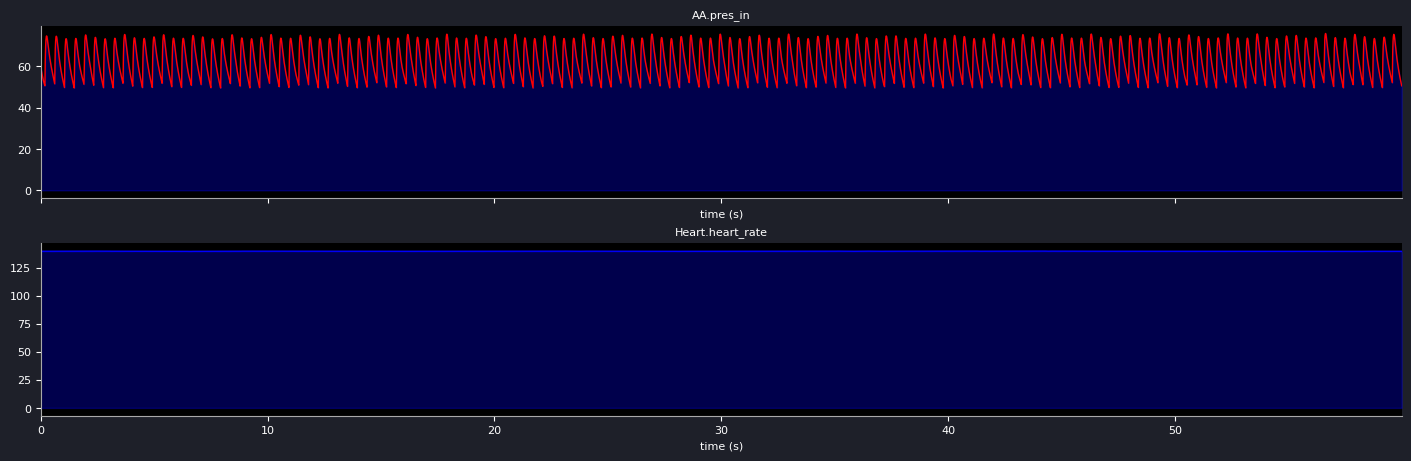


AA.pres_in      : max   75.92155 min   49.53036
Heart.heart_rate: max  139.63911 min  139.35734


In [2]:
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres_in","Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [8]:
neo.fastforward(120)

 Ready in 6.2 sec. Average model step in 0.0260 ms.


In [9]:
neo.get_vitals()


AA.pres         : max   70.40819, min    45.4074 mmHg
PA.pres         : max   41.49692, min   18.13754 mmHg
IVCI.pres       : max    2.72308, min     1.4521 mmHg


{'heartrate': 139.47654334677222,
 'spo2_pre': 97.85028613953651,
 'spo2_post': 97.56422995318265,
 'abp_systole': 70.40819,
 'abp_diastole': 45.4074,
 'pap_systole': 41.49692,
 'pap_diastole': 18.13754,
 'cvp': 1.875717634,
 'resp_rate': 41.28644361692148,
 'pH': 7.400574547403339,
 'po2': 98.45808317307355,
 'pco2': 42.363337056759136,
 'hco3': 25.958433853242408,
 'be': 0.7127185050231553}